##### 1. –í —Ñ–∞–π–ª–µ ¬´baseball.csv¬ª –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤—ã–±–æ—Ä–∫–∞ —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –ø–æ –∏–≥—Ä–æ–∫–∞–º –≤ –±–µ–π—Å–±–æ–ª, –≤–∫–ª—é—á–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏, –≤—Ä–µ–º—è —É—á–∞—Å—Ç–∏—è –≤ –∏–≥—Ä–∞—Ö, –ª–∏–≥–∞, –∑–∞—Ä–ø–ª–∞—Ç–∞ –∏ —Ç.–¥. Name (–∏–º—è) –Ω—É–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–º –∑–∞–ø–∏—Å–∏. –ó–∞–≥—Ä—É–∑–∏—Ç–µ —ç—Ç–æ—Ç —Ñ–∞–π–ª –∏ –ø—Ä–æ–∏–∑–≤–µ–¥–∏—Ç–µ —Å–ª–µ–¥—É—é—â–∏–µ –¥–µ–π—Å—Ç–≤–∏—è –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.

In [278]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

df = pd.read_csv('baseball.csv')
df

Name         Team  nAtBat  nHits  nHome  nRuns  nRBI  nBB  \
0       Allanson, Andy    Cleveland     293     66      1     30    29   14   
1          Ashby, Alan      Houston     315     81      7     24    38   39   
2          Davis, Alan      Seattle     479    130     18     66    72   76   
3        Dawson, Andre     Montreal     496    141     20     65    78   37   
4    Galarraga, Andres     Montreal     321     87     10     39    42   30   
..                 ...          ...     ...    ...    ...    ...   ...  ...   
317      McGee, Willie     St Louis     497    127      7     65    48   37   
318   Randolph, Willie     New York     492    136      5     76    50   94   
319    Tolleson, Wayne      Chicago     475    126      3     61    43   52   
320     Upshaw, Willie      Toronto     573    144      9     85    60   78   
321     Wilson, Willie  Kansas City     631    170      9     77    44   31   

     YrMajor  CrAtBat  ...  CrBB    League  Division  Position  nOuts nAssts  \
0          1      293  ...    14  American      East         C    446     33   
1         14     3449  ...   375  National      West         C    632     43   
2          3     1624  ...   263  American      West        1B    880     82   
3         11     5628  ...   354  National      East        RF    200     11   
4          2      396  ...    33  National      East        1B    805     40   
..       ...      ...  ...   ...       ...       ...       ...    ...    ...   
317        5     2703  ...   138  National      East        CF    325      9   
318       12     5511  ...   875  American      East        2B    313    381   
319        6     1700  ...   146  American      West        3B     37    113   
320        8     3198  ...   332  American      East        1B   1314    131   
321       11     4908  ...   249  American      West        CF    408      4   

    nError  Salary  Div  logSalary  
0       20     NaN   AE        NaN  
1       10   475.0   NW   6.163315  
2       14   480.0   AW   6.173786  
3        3   500.0   NE   6.214608  
4        4    91.5   NE   4.516339  
..     ...     ...  ...        ...  
317      3   700.0   NE   6.551080  
318     20   875.0   AE   6.774224  
319      7   385.0   AW   5.953243  
320     12   960.0   AE   6.866933  
321      3  1000.0   AW   6.907755  

[322 rows x 24 columns]

In [279]:
cat_cols = ['Div', 'Division', 'League', 'Position', 'Team']

numeric_cols = [
    'CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns',
    'Salary', 'nAssts', 'nAtBat', 'nBB', 'nError',
    'nHits', 'nHome', 'nOuts', 'nRBI', 'nRuns', 'YrMajor'
]


##### 2. –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤. –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è Salary (–∏ log Salary) –º–æ–∂–µ—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏, –ø—Ä–æ–∏–∑–≤–µ–¥–∏—Ç–µ –ø–æ–¥—Å—Ç–∞–Ω–æ–≤–∫—É –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ—Ç–æ–¥–æ–º —Å–æ–≥–ª–∞—Å–Ω–æ –≤–∞—à–µ–º—É –≤–∞—Ä–∏–∞–Ω—Ç—É. –ü–µ—Ä–µ—Å—á–∏—Ç–∞–π—Ç–µ logSalary –∫–∞–∫ log(1+Salary), —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –±–æ–ª–µ–µ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.

In [280]:
df_forcorr=df.drop(columns=cat_cols+['Name'])
correlations = df_forcorr.corr()
relevant_features = correlations[correlations.abs() > 0.5].index.tolist()
relevant_features

['nAtBat',
 'nHits',
 'nHome',
 'nRuns',
 'nRBI',
 'nBB',
 'YrMajor',
 'CrAtBat',
 'CrHits',
 'CrHome',
 'CrRuns',
 'CrRbi',
 'CrBB',
 'nOuts',
 'nAssts',
 'nError',
 'Salary',
 'logSalary']

In [281]:
from sklearn.impute import KNNImputer
import numpy as np


# –ø–µ—Ä–µ—Å–æ–∑–¥–∞–Ω–∏–µ 'logSalary'
df['logSalary'] = np.log1p(df['Salary'])

# –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è KNNImputer
imputer = KNNImputer(n_neighbors=3)

# –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∏–º–ø—É—Ç–∞—Ü–∏–∏
df[relevant_features] = imputer.fit_transform(df[relevant_features])

# –æ–∫—Ä—É–≥–ª–µ–Ω–∏–µ 'Salary' –¥–æ 1 –∑–Ω–∞–∫–∞ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π
df['Salary'] = df['Salary'].round(1)
df['logSalary']=np.log1p(df['Salary'])
df


Name         Team  nAtBat  nHits  nHome  nRuns  nRBI   nBB  \
0       Allanson, Andy    Cleveland   293.0   66.0    1.0   30.0  29.0  14.0   
1          Ashby, Alan      Houston   315.0   81.0    7.0   24.0  38.0  39.0   
2          Davis, Alan      Seattle   479.0  130.0   18.0   66.0  72.0  76.0   
3        Dawson, Andre     Montreal   496.0  141.0   20.0   65.0  78.0  37.0   
4    Galarraga, Andres     Montreal   321.0   87.0   10.0   39.0  42.0  30.0   
..                 ...          ...     ...    ...    ...    ...   ...   ...   
317      McGee, Willie     St Louis   497.0  127.0    7.0   65.0  48.0  37.0   
318   Randolph, Willie     New York   492.0  136.0    5.0   76.0  50.0  94.0   
319    Tolleson, Wayne      Chicago   475.0  126.0    3.0   61.0  43.0  52.0   
320     Upshaw, Willie      Toronto   573.0  144.0    9.0   85.0  60.0  78.0   
321     Wilson, Willie  Kansas City   631.0  170.0    9.0   77.0  44.0  31.0   

     YrMajor  CrAtBat  ...   CrBB    League  Division  Position   nOuts  \
0        1.0    293.0  ...   14.0  American      East         C   446.0   
1       14.0   3449.0  ...  375.0  National      West         C   632.0   
2        3.0   1624.0  ...  263.0  American      West        1B   880.0   
3       11.0   5628.0  ...  354.0  National      East        RF   200.0   
4        2.0    396.0  ...   33.0  National      East        1B   805.0   
..       ...      ...  ...    ...       ...       ...       ...     ...   
317      5.0   2703.0  ...  138.0  National      East        CF   325.0   
318     12.0   5511.0  ...  875.0  American      East        2B   313.0   
319      6.0   1700.0  ...  146.0  American      West        3B    37.0   
320      8.0   3198.0  ...  332.0  American      East        1B  1314.0   
321     11.0   4908.0  ...  249.0  American      West        CF   408.0   

    nAssts nError  Salary  Div  logSalary  
0     33.0   20.0    88.3   AE   4.492001  
1     43.0   10.0   475.0   NW   6.165418  
2     82.0   14.0   480.0   AW   6.175867  
3     11.0    3.0   500.0   NE   6.216606  
4     40.0    4.0    91.5   NE   4.527209  
..     ...    ...     ...  ...        ...  
317    9.0    3.0   700.0   NE   6.552508  
318  381.0   20.0   875.0   AE   6.775366  
319  113.0    7.0   385.0   AW   5.955837  
320  131.0   12.0   960.0   AE   6.867974  
321    4.0    3.0  1000.0   AW   6.908755  

[322 rows x 24 columns]

3. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö ‚Äì –ø—Ä–∏–≤–µ–¥–∏—Ç–µ —á–∏—Å–ª–æ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∫ –±–ª–∏–∑–∫–∏–º —à–∫–∞–ª–∞–º —Å –ø–æ–º–æ—â—å—é 
–º–µ—Ç–æ–¥–æ–≤ –¥–ª—è –≤–∞—à–µ–≥–æ –≤–∞—Ä–∏–∞–Ω—Ç–∞ –∏ –∑–∞–∫–æ–¥–∏—Ä—É–π—Ç–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é OneHotEncoder.

In [282]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_cols = ['Div', 'Division', 'League', 'Position', 'Team']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(df[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_cols), index=df.index)

df_first_part = df.iloc[:, :1]  
df_rest_part = df.iloc[:, 1:] 

df_encoded = pd.concat([df_first_part, encoded_cat_df, df_rest_part], axis=1)

df_encoded = df_encoded.drop(columns=cat_cols)

df_encoded


Name  Div_AE  Div_AW  Div_NE  Div_NW  Division_East  \
0       Allanson, Andy     1.0     0.0     0.0     0.0            1.0   
1          Ashby, Alan     0.0     0.0     0.0     1.0            0.0   
2          Davis, Alan     0.0     1.0     0.0     0.0            0.0   
3        Dawson, Andre     0.0     0.0     1.0     0.0            1.0   
4    Galarraga, Andres     0.0     0.0     1.0     0.0            1.0   
..                 ...     ...     ...     ...     ...            ...   
317      McGee, Willie     0.0     0.0     1.0     0.0            1.0   
318   Randolph, Willie     1.0     0.0     0.0     0.0            1.0   
319    Tolleson, Wayne     0.0     1.0     0.0     0.0            0.0   
320     Upshaw, Willie     1.0     0.0     0.0     0.0            1.0   
321     Wilson, Willie     0.0     1.0     0.0     0.0            0.0   

     Division_West  League_American  League_National  Position_13  ...  \
0              0.0              1.0              0.0          0.0  ...   
1              1.0              0.0              1.0          0.0  ...   
2              1.0              1.0              0.0          0.0  ...   
3              0.0              0.0              1.0          0.0  ...   
4              0.0              0.0              1.0          0.0  ...   
..             ...              ...              ...          ...  ...   
317            0.0              0.0              1.0          0.0  ...   
318            0.0              1.0              0.0          0.0  ...   
319            1.0              1.0              0.0          0.0  ...   
320            0.0              1.0              0.0          0.0  ...   
321            1.0              1.0              0.0          0.0  ...   

     CrHits  CrHome  CrRuns  CrRbi   CrBB   nOuts  nAssts  nError  Salary  \
0      66.0     1.0    30.0   29.0   14.0   446.0    33.0    20.0    88.3   
1     835.0    69.0   321.0  414.0  375.0   632.0    43.0    10.0   475.0   
2     457.0    63.0   224.0  266.0  263.0   880.0    82.0    14.0   480.0   
3    1575.0   225.0   828.0  838.0  354.0   200.0    11.0     3.0   500.0   
4     101.0    12.0    48.0   46.0   33.0   805.0    40.0     4.0    91.5   
..      ...     ...     ...    ...    ...     ...     ...     ...     ...   
317   806.0    32.0   379.0  311.0  138.0   325.0     9.0     3.0   700.0   
318  1511.0    39.0   897.0  451.0  875.0   313.0   381.0    20.0   875.0   
319   433.0     7.0   217.0   93.0  146.0    37.0   113.0     7.0   385.0   
320   857.0    97.0   470.0  420.0  332.0  1314.0   131.0    12.0   960.0   
321  1457.0    30.0   775.0  357.0  249.0   408.0     4.0     3.0  1000.0   

     logSalary  
0     4.492001  
1     6.165418  
2     6.175867  
3     6.216606  
4     4.527209  
..         ...  
317   6.552508  
318   6.775366  
319   5.955837  
320   6.867974  
321   6.908755  

[322 rows x 76 columns]

In [283]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = [
    'CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns',
    'logSalary', 'Salary', 'nAssts', 'nAtBat', 'nBB', 'nError',
    'nHits', 'nHome', 'nOuts', 'nRBI', 'nRuns', 'YrMajor'
]


scaler = MinMaxScaler()

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
df_encoded[numeric_cols].describe().T[['min', 'max']]


min  max
CrAtBat    0.0  1.0
CrBB       0.0  1.0
CrHits     0.0  1.0
CrHome     0.0  1.0
CrRbi      0.0  1.0
CrRuns     0.0  1.0
logSalary  0.0  1.0
Salary     0.0  1.0
nAssts     0.0  1.0
nAtBat     0.0  1.0
nBB        0.0  1.0
nError     0.0  1.0
nHits      0.0  1.0
nHome      0.0  1.0
nOuts      0.0  1.0
nRBI       0.0  1.0
nRuns      0.0  1.0
YrMajor    0.0  1.0

4. –° –ø–æ–º–æ—â—å—é –≤–æ—Å—Ö–æ–¥—è—â–µ–π –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ —Å –≤—ã–±—Ä–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ 
—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è —Å–æ–≥–ª–∞—Å–Ω–æ –≤–∞—à–µ–º—É –≤–∞—Ä–∏–∞–Ω—Ç—É –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –∫–ª–∞—Å—Ç–µ—Ä–Ω—É—é –º–æ–¥–µ–ª—å –¥–∞–Ω–Ω—ã—Ö –∏ –¥–µ–Ω–¥—Ä–æ–≥—Ä–∞–º–º—É

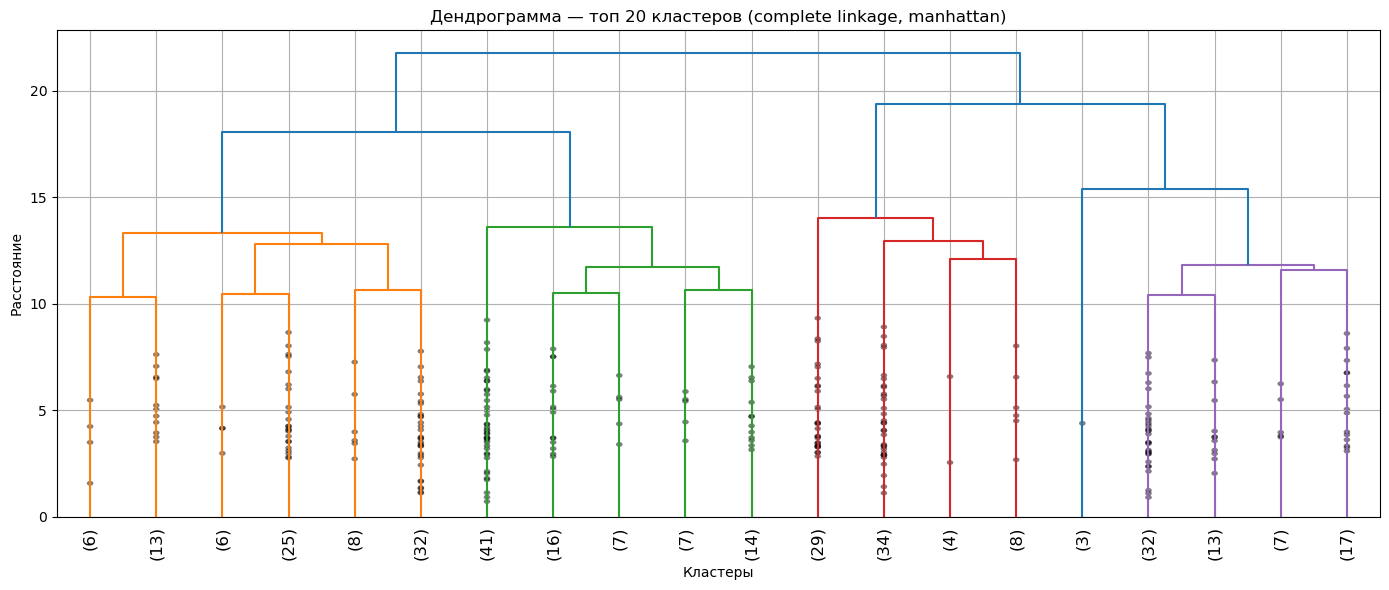

In [284]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

X = df_encoded.drop(columns=['Name'])

distance_matrix = pdist(X, metric='cityblock')

linkage_matrix = sch.linkage(distance_matrix, method='complete')  

plt.figure(figsize=(14, 6))
sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90, leaf_font_size=12, show_contracted=True)
plt.title("–î–µ–Ω–¥—Ä–æ–≥—Ä–∞–º–º–∞ ‚Äî —Ç–æ–ø 20 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (complete linkage, manhattan)")
plt.xlabel("–ö–ª–∞—Å—Ç–µ—Ä—ã")
plt.ylabel("–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ")
plt.grid(True)
plt.tight_layout()
plt.show()


## –§–æ—Ä–º—É–ª—ã –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏

### –ú–∞–Ω—Ö—ç—Ç—Ç–µ–Ω—Å–∫–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ (Manhattan distance)

–ú–∞–Ω—Ö—ç—Ç—Ç–µ–Ω—Å–∫–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –¥–≤—É–º—è —Ç–æ—á–∫–∞–º–∏ \( x = (x_1, x_2, ..., x_n) \) –∏ \( y = (y_1, y_2, ..., y_n) \):

$$
D_{\text{Manhattan}}(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

---

### Complete Linkage (–ø–æ–ª–Ω–æ–µ —Å–æ–µ–¥–∏–Ω–µ–Ω–∏–µ)

–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –¥–≤—É–º—è –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ \( A \) –∏ \( B \) –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –º–µ—Ç–æ–¥–∞ –ø–æ–ª–Ω–æ–≥–æ —Å–æ–µ–¥–∏–Ω–µ–Ω–∏—è (complete linkage) –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–∞–∫:

$$
D_{\text{complete}}(A, B) = \max_{a \in A, b \in B} D(a, b)
$$

–≥–¥–µ \( D(a, b) \) ‚Äî —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏ \( a \) –∏ \( b \).

---

### –ò–Ω–¥–µ–∫—Å Pseudo-F

–ò–Ω–¥–µ–∫—Å Pseudo-F (Calinski-Harabasz index) –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏:

$$
F = \frac{B(k) / (k - 1)}{W(k) / (N - k)}
$$

–≥–¥–µ:

- \( B(k) \) ‚Äî –º–µ–∂–∫–ª–∞—Å—Ç–µ—Ä–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è (between-cluster dispersion)
- \( W(k) \) ‚Äî –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Ç–µ—Ä–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è (within-cluster dispersion)
- \( k \) ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
- \( N \) ‚Äî –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
- –ß–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ \( F \), —Ç–µ–º –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–µ–µ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è.

---

### –ù–∞–ø–æ–º–∏–Ω–∞–Ω–∏–µ

- –í—ã–±–∏—Ä–∞–µ–º **–ø–µ—Ä–≤—ã–π –ª–æ–∫–∞–ª—å–Ω—ã–π –º–∞–∫—Å–∏–º—É–º** –≥—Ä–∞—Ñ–∏–∫–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ \( F \) –æ—Ç \( k \) ‚Äî –æ–Ω —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.


5. –†–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫—Ä–∏—Ç–µ—Ä–∏—è pseudoF –¥–ª—è –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ 2-20 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, 
–ø–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è –æ—Ç —á–∏—Å–ª–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏ –≤—ã–±–µ—Ä–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ (–ø–µ—Ä–≤—ã–π 
–ª–æ–∫–∞–ª—å–Ω—ã–π –ø–∏–∫ –∫—Ä–∏—Ç–µ—Ä–∏—è –ø—Ä–∏ –æ–±—Ö–æ–¥–µ –æ—Ç –º–∞–ª–æ–≥–æ —á–∏—Å–ª–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∫ –±–æ–ª—å—à–æ–º—É). –û—Ç–º–µ—Ç—å—Ç–µ —Ç–æ—á–∫—É 
–Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ. –°–∫–æ–ª—å–∫–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø–æ–ª—É—á–∏–ª–æ—Å—å?

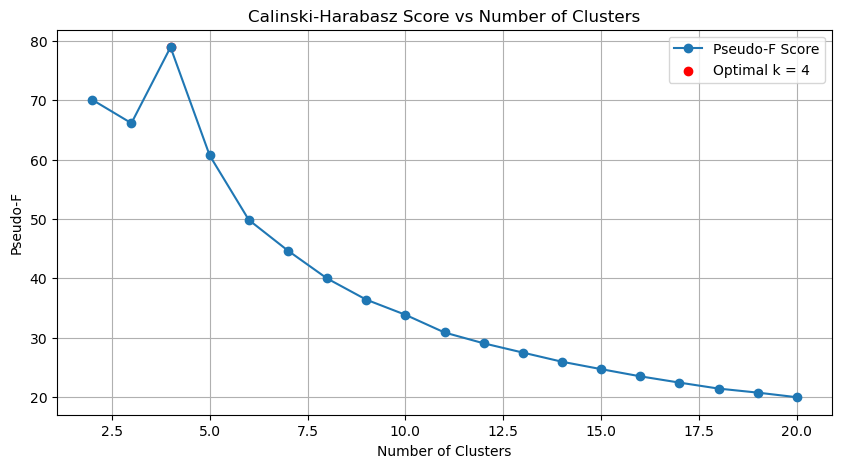

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: 4


[70.09377419151444,
 66.14881870669605,
 78.94948816390394,
 60.71312811609179,
 49.84825251156206,
 44.67034965046573,
 39.98474695963534,
 36.416639801508445,
 33.86912324825525,
 30.881655974710146,
 29.06024593997747,
 27.49863069960325,
 25.956546934598382,
 24.708589891152517,
 23.496927589048948,
 22.440314242069586,
 21.43146215042322,
 20.751911516605585,
 19.975786265714557]

In [285]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

X_scaled=df_encoded.drop(columns='Name')
Z=linkage_matrix

pseudoF_scores = []
cluster_range = range(2, 21)

for k in cluster_range:
    labels = fcluster(Z, k, criterion='maxclust')
    score = calinski_harabasz_score(X_scaled, labels)
    pseudoF_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, pseudoF_scores, marker='o', label='Pseudo-F Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Pseudo-F')
plt.title('Calinski-Harabasz Score vs Number of Clusters')


scores_array = np.array(pseudoF_scores)
local_maxima = argrelextrema(scores_array, np.greater)[0]

best_k = cluster_range[local_maxima[0]]
best_score = pseudoF_scores[local_maxima[0]]
plt.scatter(best_k, best_score, color='red', label=f'Optimal k = {best_k}')

plt.legend()
plt.grid(True)
plt.show()

print(f'–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: {best_k}')
pseudoF_scores


6. –° –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ –ø—Ä–æ–µ–∫—Ü–∏–∏ –¥–ª—è –≤–∞—à–µ–≥–æ –≤–∞—Ä–∏–∞–Ω—Ç–∞ –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç—å, 
—Ü–≤–µ—Ç–æ–º —Ç–æ—á–∫–∏ —É–∫–∞–∂–∏—Ç–µ –Ω–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞.  (PCA)

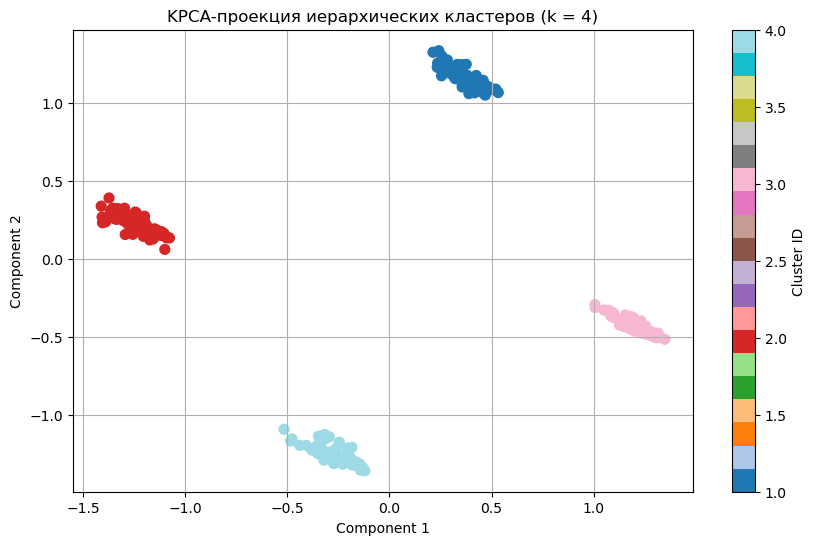

In [286]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. –ü–æ—Å—Ç—Ä–æ–∏–º –ø—Ä–æ–µ–∫—Ü–∏—é —á–µ—Ä–µ–∑ KPCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –∫–ª–∞—Å—Ç–µ—Ä—ã (–∏—Å–ø–æ–ª—å–∑—É–µ–º Z ‚Äî —Ä–µ–∑—É–ª—å—Ç–∞—Ç linkage)
from scipy.cluster.hierarchy import fcluster

k = best_k  # –ø–æ–¥—Å—Ç–∞–≤–ª—è–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏–∑ –ø—Ä–æ—à–ª–æ–≥–æ —à–∞–≥–∞
labels = fcluster(Z, k, criterion='maxclust')

# 3. –†–∏—Å—É–µ–º —Ç–æ—á–∫–∏ —Å —Ü–≤–µ—Ç–∞–º–∏ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab20', s=50)
plt.title(f'KPCA-–ø—Ä–æ–µ–∫—Ü–∏—è –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∏—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (k = {k})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()


In [287]:
from scipy.spatial.distance import cdist

df_clusters = df.copy()
df_clusters['cluster'] = labels

typical_players = []

for cl in range(1, k + 1):
    cluster_data = X_scaled[df_clusters['cluster'] == cl]
    cluster_names = df_clusters[df_clusters['cluster'] == cl]['Name'].values
    
    centroid = cluster_data.mean(axis=0).values.reshape(1, -1)
    
    distances = cdist(cluster_data, centroid, metric='euclidean').flatten()
    closest_index = distances.argmin()
    typical_players.append((cl, cluster_names[closest_index]))

print("–ù–∞–∏–±–æ–ª–µ–µ —Ç–∏–ø–∏—á–Ω—ã–µ –∏–≥—Ä–æ–∫–∏ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º:")
for cluster_id, name in typical_players:
    print(f"–ö–ª–∞—Å—Ç–µ—Ä {cluster_id}: {name}")


–ù–∞–∏–±–æ–ª–µ–µ —Ç–∏–ø–∏—á–Ω—ã–µ –∏–≥—Ä–æ–∫–∏ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º:
–ö–ª–∞—Å—Ç–µ—Ä 1: Henderson, Dave
–ö–ª–∞—Å—Ç–µ—Ä 2: Hassey, Ron
–ö–ª–∞—Å—Ç–µ—Ä 3: Esasky, Nick
–ö–ª–∞—Å—Ç–µ—Ä 4: Wilson, Mookie


In [288]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
gmm = GaussianMixture(n_components=k, covariance_type='spherical', random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

In [289]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)      # –ü—Ä–æ–µ–∫—Ü–∏—è –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
means = gmm.means_                       # –¶–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ
means_pca = pca.transform(means)        # –¶–µ–Ω—Ç—Ä—ã –≤ 2D –ø—Ä–æ–µ–∫—Ü–∏–∏

In [290]:
covariances = gmm.covariances_           # –í–µ–∫—Ç–æ—Ä –¥–∏—Å–ø–µ—Ä—Å–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
radii = np.sqrt(covariances)              # –†–∞–¥–∏—É—Å –∫–∞–∂–¥–æ–π —Å—Ñ–µ—Ä—ã (–∫–ª–∞—Å—Ç–µ—Ä–∞)

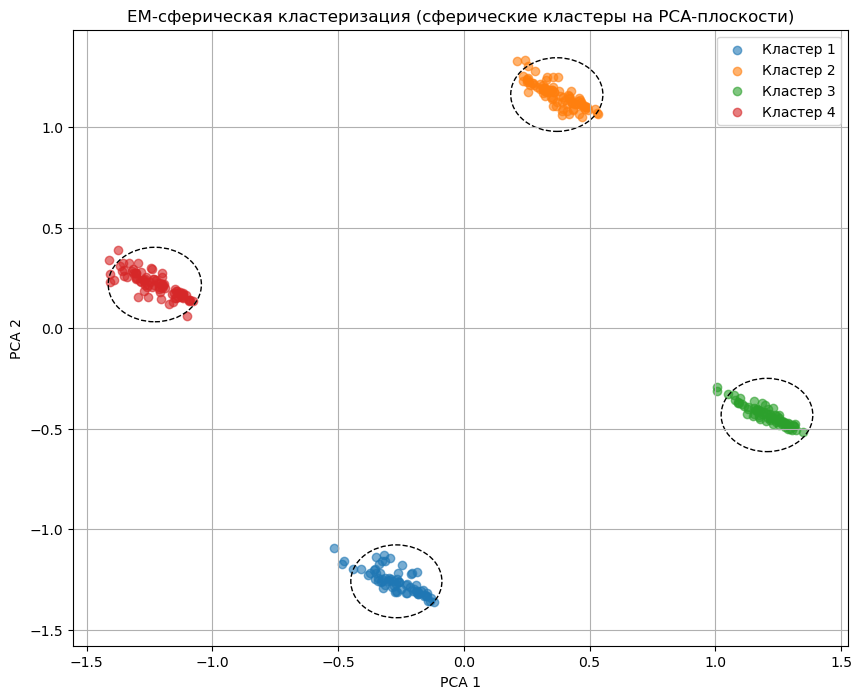

In [291]:
plt.figure(figsize=(10, 8))

for cluster_id in range(k):
    # –¢–æ—á–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–∞ –Ω–∞ 2D
    cluster_points = X_pca[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], alpha=0.6, label=f'–ö–ª–∞—Å—Ç–µ—Ä {cluster_id+1}')
    
    # –†–∏—Å—É–µ–º –æ–∫—Ä—É–∂–Ω–æ—Å—Ç—å —Å —Ü–µ–Ω—Ç—Ä–æ–º –≤ mean –∏ —Ä–∞–¥–∏—É—Å–æ–º sqrt(–¥–∏—Å–ø–µ—Ä—Å–∏–∏)
    circle = plt.Circle((means_pca[cluster_id, 0], means_pca[cluster_id, 1]), 
                        radii[cluster_id], 
                        color='black', fill=False, linestyle='--')
    plt.gca().add_patch(circle)

plt.title("EM-—Å—Ñ–µ—Ä–∏—á–µ—Å–∫–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è (—Å—Ñ–µ—Ä–∏—á–µ—Å–∫–∏–µ –∫–ª–∞—Å—Ç–µ—Ä—ã –Ω–∞ PCA-–ø–ª–æ—Å–∫–æ—Å—Ç–∏)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()


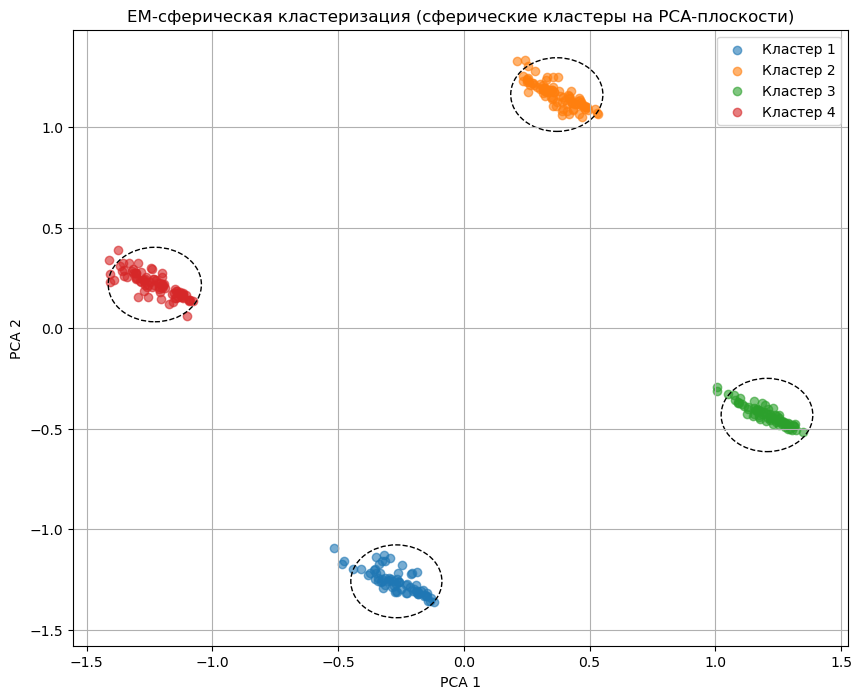

In [292]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


gmm = GaussianMixture(n_components=k, covariance_type='spherical', random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

means = gmm.means_             # shape (k, n_features)
covariances = gmm.covariances_ # shape (k,) ‚Äî —ç—Ç–æ —Å–∫–∞–ª—è—Ä–Ω—ã–µ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞

means_pca = pca.transform(means)

plt.figure(figsize=(10, 8))


for cluster_id in range(k):
    cluster_points = X_pca[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], alpha=0.6, label=f'–ö–ª–∞—Å—Ç–µ—Ä {cluster_id+1}')
    
    radius = np.sqrt(covariances[cluster_id])
    

    circle = plt.Circle((means_pca[cluster_id, 0], means_pca[cluster_id, 1]), radius, color='black', fill=False, linestyle='--')
    plt.gca().add_patch(circle)

plt.title("EM-—Å—Ñ–µ—Ä–∏—á–µ—Å–∫–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è (—Å—Ñ–µ—Ä–∏—á–µ—Å–∫–∏–µ –∫–ª–∞—Å—Ç–µ—Ä—ã –Ω–∞ PCA-–ø–ª–æ—Å–∫–æ—Å—Ç–∏)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from scipy.signal import argrelextrema


def encode_categorical(df, cat_cols):
    """
    –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é OneHotEncoder
    
    Args:
        df (pd.DataFrame): –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
        cat_cols (list): —Å–ø–∏—Å–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
    
    Returns:
        pd.DataFrame: –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
    """
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_cats = encoder.fit_transform(df[cat_cols])
    encoded_cat_df = pd.DataFrame(
        encoded_cats, 
        columns=encoder.get_feature_names_out(cat_cols), 
        index=df.index
    )
    return encoded_cat_df


def scale_numerical(df, num_cols):
    """
    –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é MinMaxScaler
    
    Args:
        df (pd.DataFrame): –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
        num_cols (list): —Å–ø–∏—Å–æ–∫ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
    
    Returns:
        pd.DataFrame: –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
    """
    # –°–æ–∑–¥–∞–Ω–∏–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –¥–ª—è Salary
    df_copy = df.copy()
    if 'Salary' in num_cols:
        df_copy['logSalary'] = np.log1p(df_copy['Salary'])
        if 'logSalary' not in num_cols:
            num_cols = num_cols + ['logSalary']
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_copy[num_cols])
    scaled_df = pd.DataFrame(scaled_data, columns=num_cols, index=df.index)
    
    return scaled_df


def impute_missing(df, k=3):
    """
    –ò–º–ø—É—Ç–∞—Ü–∏—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å –ø–æ–º–æ—â—å—é KNNImputer
    
    Args:
        df (pd.DataFrame): –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
        k (int): –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ—Å–µ–¥–µ–π –¥–ª—è KNN –∏–º–ø—É—Ç–∞—Ü–∏–∏
    
    Returns:
        pd.DataFrame: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –±–µ–∑ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    """
    imputer = KNNImputer(n_neighbors=k)
    imputed_data = imputer.fit_transform(df)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)
    
    # –û–∫—Ä—É–≥–ª–µ–Ω–∏–µ Salary –µ—Å–ª–∏ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç
    if 'Salary' in imputed_df.columns:
        imputed_df['Salary'] = imputed_df['Salary'].round(1)
        if 'logSalary' in imputed_df.columns:
            imputed_df['logSalary'] = np.log1p(imputed_df['Salary'])
    
    return imputed_df


def select_high_correlation_features(df, threshold=0.4):
    """
    –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –≤—ã—Å–æ–∫–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π
    
    Args:
        df (pd.DataFrame): –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
        threshold (float): –ø–æ—Ä–æ–≥ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
    
    Returns:
        pd.DataFrame: –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    """
    correlations = df.corr()
    relevant_features = correlations[correlations.abs() > threshold].index.tolist()
    return df[relevant_features]


def perform_hierarchical_clustering(df):
    """
    –í—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
    
    Args:
        df (pd.DataFrame): –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
    
    Returns:
        linkage matrix: –º–∞—Ç—Ä–∏—Ü–∞ —Å–≤—è–∑–µ–π –¥–ª—è –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
    """
    distance_matrix = pdist(df, metric='cityblock')
    Z = sch.linkage(distance_matrix, method='complete')
    return Z


def plot_dendrogram(Z, title="–î–µ–Ω–¥—Ä–æ–≥—Ä–∞–º–º–∞ ‚Äî —Ç–æ–ø 20 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤"):
    """
    –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –¥–µ–Ω–¥—Ä–æ–≥—Ä–∞–º–º—ã
    
    Args:
        Z: –º–∞—Ç—Ä–∏—Ü–∞ —Å–≤—è–∑–µ–π
        title (str): –∑–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞
    """
    plt.figure(figsize=(14, 6))
    sch.dendrogram(Z, truncate_mode='lastp', p=20, 
                  leaf_rotation=90, leaf_font_size=12, show_contracted=True)
    plt.title(title)
    plt.xlabel("–ö–ª–∞—Å—Ç–µ—Ä—ã")
    plt.ylabel("–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def find_optimal_k(df, Z, n_clusters_range=(2, 21)):
    """
    –ü–æ–∏—Å–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø–æ –ø—Å–µ–≤–¥–æ-F –∫—Ä–∏—Ç–µ—Ä–∏—é
    
    Args:
        df (pd.DataFrame): –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
        Z: –º–∞—Ç—Ä–∏—Ü–∞ —Å–≤—è–∑–µ–π
        n_clusters_range (tuple): –¥–∏–∞–ø–∞–∑–æ–Ω –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    
    Returns:
        int: –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    """
    pseudoF_scores = []
    cluster_range = range(n_clusters_range[0], n_clusters_range[1])
    
    for k in cluster_range:
        labels = fcluster(Z, k, criterion='maxclust')
        score = calinski_harabasz_score(df, labels)
        pseudoF_scores.append(score)
    
    # –ü–æ–∏—Å–∫ –ø–µ—Ä–≤–æ–≥–æ –ª–æ–∫–∞–ª—å–Ω–æ–≥–æ –º–∞–∫—Å–∏–º—É–º–∞
    scores_array = np.array(pseudoF_scores)
    local_maxima = argrelextrema(scores_array, np.greater)[0]
    
    if len(local_maxima) > 0:
        optimal_k = cluster_range[local_maxima[0]]
        best_score = pseudoF_scores[local_maxima[0]]
    else:
        optimal_k = cluster_range[np.argmax(pseudoF_scores)]
        best_score = max(pseudoF_scores)
    
    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
    plt.figure(figsize=(10, 5))
    plt.plot(cluster_range, pseudoF_scores, marker='o', label='Pseudo-F Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Pseudo-F')
    plt.title('Calinski-Harabasz Score vs Number of Clusters')
    plt.scatter(optimal_k, best_score, color='red', s=100, 
               label=f'Optimal k = {optimal_k}', zorder=5)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f'–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: {optimal_k}')
    return optimal_k


def project_with_kpca(df, n_components=2):
    """
    –ü—Ä–æ–µ–∫—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é PCA
    
    Args:
        df (pd.DataFrame): –¥–∞–Ω–Ω—ã–µ –¥–ª—è –ø—Ä–æ–µ–∫—Ü–∏–∏
        n_components (int): –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç
    
    Returns:
        np.array: –ø—Ä–æ–µ–∫—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç—å
    """
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(df)
    return X_pca


def plot_clusters(X_projected, labels, title="–ü—Ä–æ–µ–∫—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤"):
    """
    –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç–∏
    
    Args:
        X_projected (np.array): –ø—Ä–æ–µ–∫—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
        labels (np.array): –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
        title (str): –∑–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1], 
                         c=labels, cmap='tab20', s=50)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(scatter, label='Cluster ID')
    plt.grid(True)
    plt.show()


def perform_em_clustering(df, n_components, random_state=42):
    """
    EM-–∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å–æ —Å—Ñ–µ—Ä–∏—á–µ—Å–∫–∏–º–∏ –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏
    
    Args:
        df (pd.DataFrame): –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
        n_components (int): –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
        random_state (int): seed –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏
    
    Returns:
        tuple: (–º–æ–¥–µ–ª—å GMM, –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤)
    """
    gmm = GaussianMixture(n_components=n_components, 
                         covariance_type='spherical', 
                         random_state=random_state)
    gmm.fit(df)
    em_labels = gmm.predict(df)
    return gmm, em_labels


def plot_em_clusters(df, gmm, em_labels, X_projected):
    """
    –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è EM-–∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å–æ —Å—Ñ–µ—Ä–∞–º–∏
    
    Args:
        df (pd.DataFrame): –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
        gmm: –æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å GMM
        em_labels (np.array): –º–µ—Ç–∫–∏ EM-–∫–ª–∞—Å—Ç–µ—Ä–æ–≤
        X_projected (np.array): PCA –ø—Ä–æ–µ–∫—Ü–∏—è
    """
    pca = PCA(n_components=2)
    pca.fit(df)
    
    means_pca = pca.transform(gmm.means_)
    covariances = gmm.covariances_
    radii = np.sqrt(covariances)
    
    n_clusters = len(np.unique(em_labels))
    
    plt.figure(figsize=(10, 8))
    
    for cluster_id in range(n_clusters):
        cluster_points = X_projected[em_labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                   alpha=0.6, label=f'–ö–ª–∞—Å—Ç–µ—Ä {cluster_id+1}')
        
        # –û–∫—Ä—É–∂–Ω–æ—Å—Ç—å –¥–ª—è —Å—Ñ–µ—Ä–∏—á–µ—Å–∫–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
        circle = plt.Circle((means_pca[cluster_id, 0], means_pca[cluster_id, 1]), 
                           radii[cluster_id], color='black', fill=False, linestyle='--')
        plt.gca().add_patch(circle)
    
    plt.title("EM-—Å—Ñ–µ—Ä–∏—á–µ—Å–∫–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –Ω–∞ PCA-–ø–ª–æ—Å–∫–æ—Å—Ç–∏")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


def find_typical_representatives(df_processed, df_original, labels):
    """
    –ü–æ–∏—Å–∫ –Ω–∞–∏–±–æ–ª–µ–µ —Ç–∏–ø–∏—á–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–µ–π –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Ç–µ—Ä–µ
    
    Args:
        df_processed (pd.DataFrame): –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
        df_original (pd.DataFrame): –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –∏–º–µ–Ω–∞–º–∏
        labels (np.array): –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    
    Returns:
        dict: —Å–ª–æ–≤–∞—Ä—å —Å —Ç–∏–ø–∏—á–Ω—ã–º–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª—è–º–∏
    """
    typical_representatives = {}
    n_clusters = len(np.unique(labels))
    
    for cluster_id in range(1, n_clusters + 1):  # fcluster starts from 1
        cluster_mask = labels == cluster_id
        cluster_data = df_processed[cluster_mask]
        cluster_names = df_original[cluster_mask]['Name'].values
        
        if len(cluster_data) > 0:
            # –¶–µ–Ω—Ç—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞
            center = cluster_data.mean()
            
            # –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –∫–ª–∞—Å—Ç–µ—Ä–∞
            distances = np.linalg.norm(cluster_data - center, axis=1)
            
            # –ò–Ω–¥–µ–∫—Å –Ω–∞–∏–±–æ–ª–µ–µ –±–ª–∏–∑–∫–æ–≥–æ –∫ —Ü–µ–Ω—Ç—Ä—É
            closest_idx = np.argmin(distances)
            typical_representatives[f'–ö–ª–∞—Å—Ç–µ—Ä_{cluster_id}'] = cluster_names[closest_idx]
    
    print("\n–ù–∞–∏–±–æ–ª–µ–µ —Ç–∏–ø–∏—á–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞:")
    for cluster, name in typical_representatives.items():
        print(f"{cluster}: {name}")
    
    return typical_representatives


def process_and_cluster(df, cat_cols, num_cols, n_clusters_range=(2, 21), k=3):
    """
    –û—Å–Ω–æ–≤–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –ø–æ–ª–Ω–æ–≥–æ –ø–∞–π–ø–ª–∞–π–Ω–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
    
    Args:
        df (pd.DataFrame): –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
        cat_cols (list): —Å–ø–∏—Å–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
        num_cols (list): —Å–ø–∏—Å–æ–∫ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
        n_clusters_range (tuple): –¥–∏–∞–ø–∞–∑–æ–Ω –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
        k (int): –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ—Å–µ–¥–µ–π –¥–ª—è KNN –∏–º–ø—É—Ç–∞—Ü–∏–∏
    
    Returns:
        tuple: (–æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, —Ç–∏–ø–∏—á–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏)
    """
    print("–®–∞–≥ 1: –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö...")
    cat_encoded = encode_categorical(df, cat_cols)
    
    print("–®–∞–≥ 2: –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö...")
    num_scaled = scale_numerical(df, num_cols)
    
    print("–®–∞–≥ 3: –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö...")
    df_all = pd.concat([num_scaled, cat_encoded], axis=1)
    
    print("–®–∞–≥ 4: –ò–º–ø—É—Ç–∞—Ü–∏—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π...")
    df_imputed = impute_missing(df_all, k=k)
    
    print("–®–∞–≥ 5: –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –≤—ã—Å–æ–∫–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π...")
    df_filtered = select_high_correlation_features(df_imputed, threshold=0.4)
    
    print("–®–∞–≥ 6: –ò–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è...")
    Z = perform_hierarchical_clustering(df_filtered)
    plot_dendrogram(Z)
    
    print("–®–∞–≥ 7: –ü–æ–∏—Å–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤...")
    best_k = find_optimal_k(df_filtered, Z, n_clusters_range)
    
    print("–®–∞–≥ 8: –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏ –ø—Ä–æ–µ–∫—Ü–∏–∏...")
    labels = fcluster(Z, best_k, criterion='maxclust')
    X_kpca = project_with_kpca(df_filtered)
    plot_clusters(X_kpca, labels, title=f'PCA-–ø—Ä–æ–µ–∫—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (k = {best_k})')
    
    print("–®–∞–≥ 9: EM-–∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è...")
    gmm, em_labels = perform_em_clustering(df_filtered, best_k)
    plot_em_clusters(df_filtered, gmm, em_labels, X_kpca)
    
    print("–®–∞–≥ 10: –ü–æ–∏—Å–∫ —Ç–∏–ø–∏—á–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–µ–π...")
    typical_players = find_typical_representatives(df_filtered, df, em_labels + 1)  # +1 –¥–ª—è —Å–æ–≤–º–µ—Å—Ç–∏–º–æ—Å—Ç–∏ —Å fcluster
    
    return best_k, typical_players



In [294]:
def process_and_cluster(df, cat_cols, num_cols, n_clusters_range=(2, 21), k=3):
    cat_encoded = encode_categorical(df, cat_cols)
    num_scaled = scale_numerical(df, num_cols)
    df_all = pd.concat([num_scaled, cat_encoded], axis=1)

    df_imputed = impute_missing(df_all, k=k)
    df_filtered = select_high_correlation_features(df_imputed, threshold=0.4)
    Z = perform_hierarchical_clustering(df_filtered)
    best_k = find_optimal_k(df_filtered, Z, n_clusters_range)

    labels = fcluster(Z, best_k, criterion='maxclust')
    X_kpca = project_with_kpca(df_filtered)
    plot_clusters(X_kpca, labels, title=f'KPCA-–ø—Ä–æ–µ–∫—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (k = {best_k})')

    typical_players = find_typical_representatives(df_filtered, df, labels)

    return best_k, typical_players


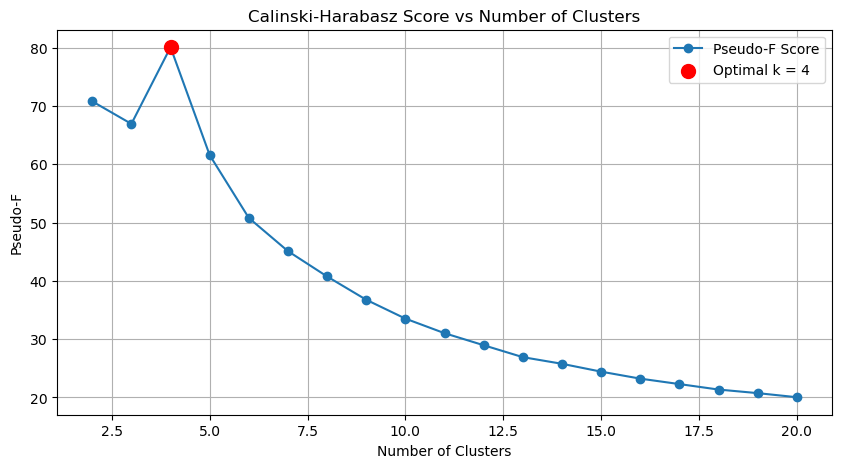

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: 4


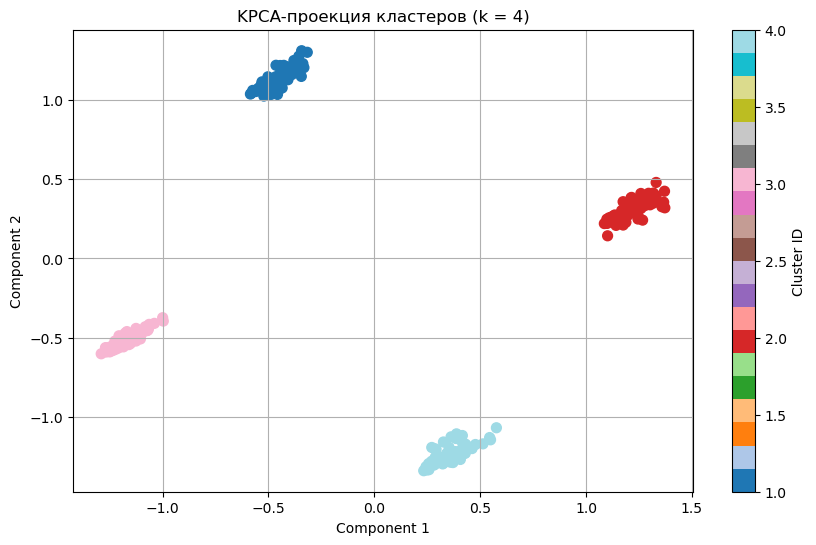


–ù–∞–∏–±–æ–ª–µ–µ —Ç–∏–ø–∏—á–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞:
–ö–ª–∞—Å—Ç–µ—Ä_1: Henderson, Dave
–ö–ª–∞—Å—Ç–µ—Ä_2: Hassey, Ron
–ö–ª–∞—Å—Ç–µ—Ä_3: Landreaux, Ken
–ö–ª–∞—Å—Ç–µ—Ä_4: Wilson, Mookie


In [295]:
cat_cols = ['Div', 'Division', 'League', 'Position', 'Team']
num_cols = ['CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns', 'logSalary', 'nAssts', 'nAtBat', 'nBB', 'nError', 'nHits', 'nHome', 'nOuts', 'nRBI', 'nRuns', 'YrMajor', 'Salary']
best_k, typical_players = process_and_cluster(df, cat_cols, num_cols)


In [296]:
from scipy.stats import skew

# –¥–æ–ø—É—Å—Ç–∏–º, num_cols ‚Äî —Å–ø–∏—Å–æ–∫ –∏—Å—Ö–æ–¥–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
skews = df[num_cols].apply(lambda s: skew(s.dropna()))
# –≤—ã–±–∏—Ä–∞–µ–º —Ç–µ, –≥–¥–µ skew > 1
to_log = skews[skews > 1].index.tolist()
print("–ë—É–¥—É—Ç –ª–æ–≥-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã:", to_log)

# –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º
df_log = df.copy()
for col in to_log:
    # log1p –±–µ–∑–æ–ø–∞—Å–µ–Ω –ø—Ä–∏ –Ω—É–ª—è—Ö
    df_log[col] = np.log1p(df_log[col])


–ë—É–¥—É—Ç –ª–æ–≥-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã: ['CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns', 'nAssts', 'nError', 'nOuts', 'Salary']


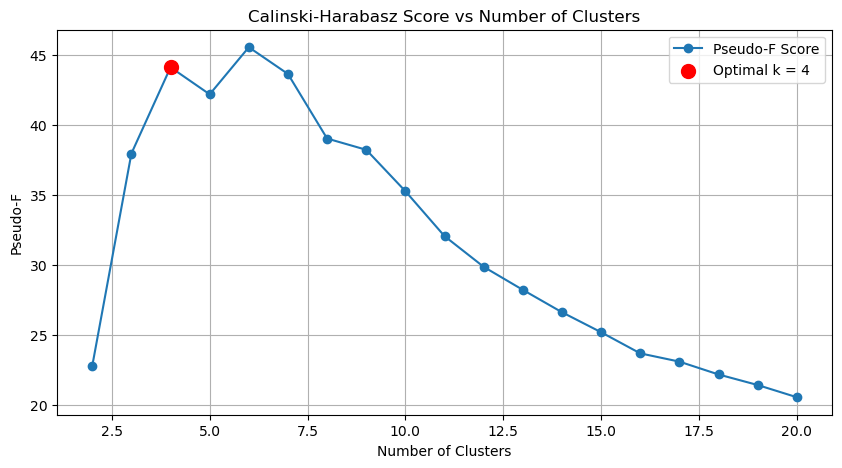

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: 4


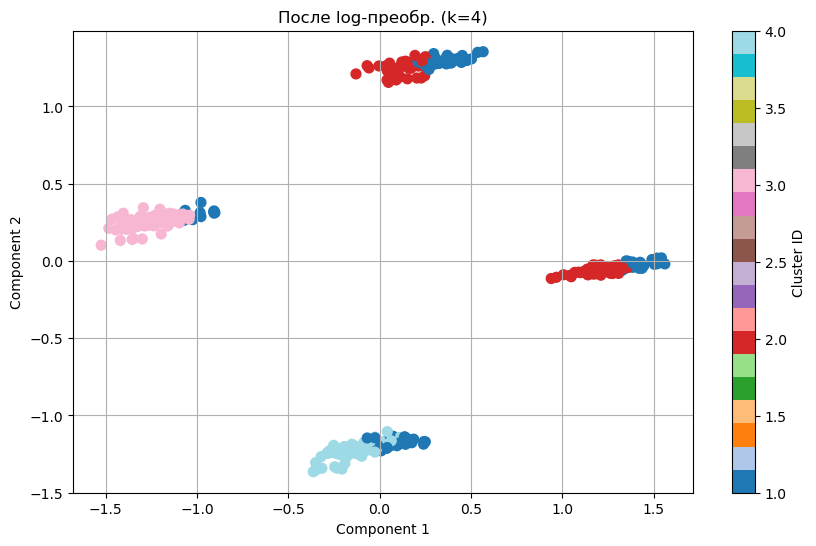


–ù–∞–∏–±–æ–ª–µ–µ —Ç–∏–ø–∏—á–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞:
–ö–ª–∞—Å—Ç–µ—Ä_1: Bilardello, Dann
–ö–ª–∞—Å—Ç–µ—Ä_2: Kennedy, Terry
–ö–ª–∞—Å—Ç–µ—Ä_3: Whitt, Ernie
–ö–ª–∞—Å—Ç–µ—Ä_4: Davis, Mike


In [297]:
cat_enc  = encode_categorical(df_log, cat_cols)
num_scl  = scale_numerical(df_log, num_cols)
df_all   = pd.concat([num_scl, cat_enc], axis=1)
df_imp   = impute_missing(df_all, k=3)

# –æ—Ç–±–æ—Ä –ø–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
df_sel   = select_high_correlation_features(df_imp, threshold=0.6)

# –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –∏ –ø–æ–∏—Å–∫ k
Z        = perform_hierarchical_clustering(df_sel)
best_k   = find_optimal_k(df_sel, Z, (2,21))

# –ø—Ä–æ–µ–∫—Ü–∏—è –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
labels9  = fcluster(Z, best_k, criterion='maxclust')
X9       = project_with_kpca(df_sel)
plot_clusters(X9, labels9, title=f'–ü–æ—Å–ª–µ log-–ø—Ä–µ–æ–±—Ä. (k={best_k})')

# —Ç–∏–ø–∏—á–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏
typ9     = find_typical_representatives(df_sel, df_log, labels9)


In [298]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
def varclus_select(df, n_groups):
    # –º–∞—Ç—Ä–∏—Ü–∞ –∞–±—Å–æ–ª—é—Ç–Ω—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
    corr = df.corr().abs()
    # —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ
    dist = 1 - corr
    # –≤ –≤–µ–∫—Ç–æ—Ä–Ω—É—é —Ñ–æ—Ä–º—É –¥–ª—è linkage
    dist_vec = squareform(dist.values, checks=False)
    Zf = linkage(dist_vec, method='average')
    # —Ä–∞–∑—Ä–µ–∑–∞–µ–º –Ω–∞ n_groups
    groups = fcluster(Zf, n_groups, criterion='maxclust')
    
    # —Å–±–æ—Ä –≥—Ä—É–ø–ø –∏ –≤—ã–±–æ—Ä —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞–Ω—Ç–∞
    selected = []
    for grp_id in np.unique(groups):
        feats = corr.columns[groups == grp_id]
        # —Å—Ä–µ–¥–Ω—è—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –≤–Ω—É—Ç—Ä–∏ –≥—Ä—É–ø–ø—ã
        avg_corr = corr.loc[feats, feats].mean().sort_values(ascending=False)
        selected.append(avg_corr.index[0])
    return selected


–ü–æ—Å–ª–µ VarClus 6 –≥—Ä—É–ø–ø: ['Team_Texas', 'Team_Chicago', 'Position_23', 'Team_Toronto', 'CrRbi', 'Division_West']
–õ—É—á—à–∏–π k –ø–æ —Å–∏–ª—É–µ—Ç—É: 7


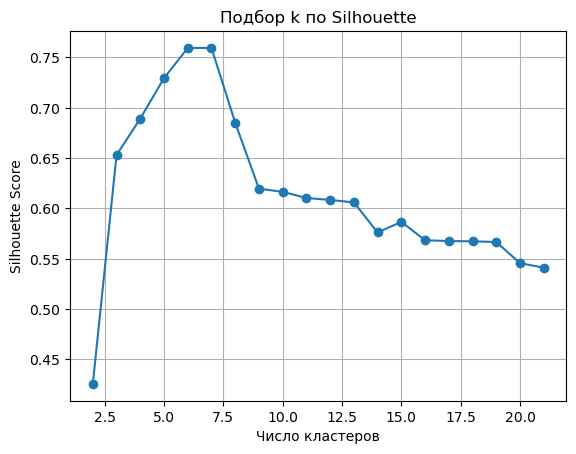

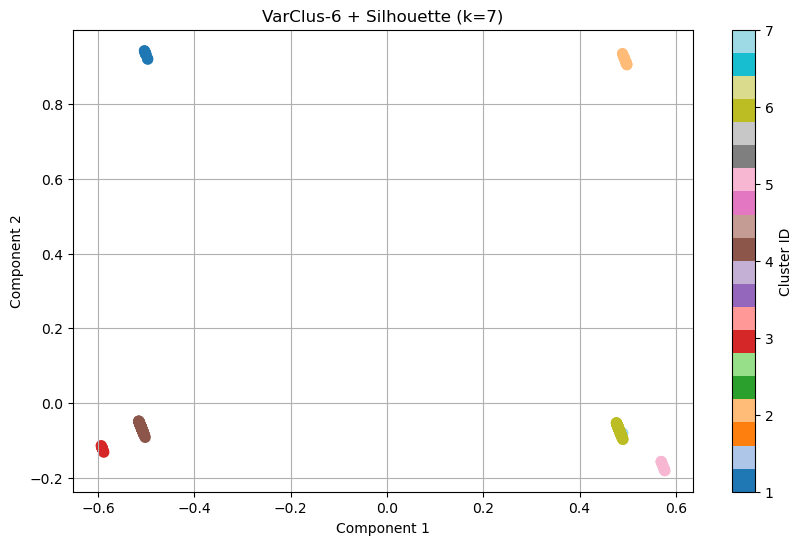


–ù–∞–∏–±–æ–ª–µ–µ —Ç–∏–ø–∏—á–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞:
–ö–ª–∞—Å—Ç–µ—Ä_1: Davis, Jody
–ö–ª–∞—Å—Ç–µ—Ä_2: Hairston, Jerry
–ö–ª–∞—Å—Ç–µ—Ä_3: Garcia, Damaso
–ö–ª–∞—Å—Ç–µ—Ä_4: Butler, Brett
–ö–ª–∞—Å—Ç–µ—Ä_5: Slaught, Don
–ö–ª–∞—Å—Ç–µ—Ä_6: Virgil, Ozzie
–ö–ª–∞—Å—Ç–µ—Ä_7: Hill, Donnie


In [299]:
from sklearn.metrics import silhouette_score
n_groups=6
feat10b = varclus_select(df_imp, n_groups=n_groups)
print(f"–ü–æ—Å–ª–µ VarClus {n_groups} –≥—Ä—É–ø–ø:", feat10b)

df10b = df_imp[feat10b]

Z10b = perform_hierarchical_clustering(df10b)
sil_scores = []
ks = range(2, 22)
for k in ks:
    labels_k = fcluster(Z10b, k, criterion='maxclust')
    sil_scores.append(silhouette_score(df10b, labels_k))

best_k10b = ks[int(np.argmax(sil_scores))]
print("–õ—É—á—à–∏–π k –ø–æ —Å–∏–ª—É–µ—Ç—É:", best_k10b)

plt.plot(ks, sil_scores, marker='o')
plt.xlabel('–ß–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤')
plt.ylabel('Silhouette Score')
plt.title('–ü–æ–¥–±–æ—Ä k –ø–æ Silhouette')
plt.grid(True)
plt.show()

labels10b = fcluster(Z10b, best_k10b, criterion='maxclust')
X10b = project_with_kpca(df10b)
plot_clusters(X10b, labels10b, title=f'VarClus-{n_groups} + Silhouette (k={best_k10b})')

typ10b = find_typical_representatives(df10b, df, labels10b)


–≠–¢–ê–ü 1: –ê–Ω–∞–ª–∏–∑ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

–ö–õ–ê–°–¢–ï–†–ò–ó–ê–¶–ò–Ø: ORIGINAL


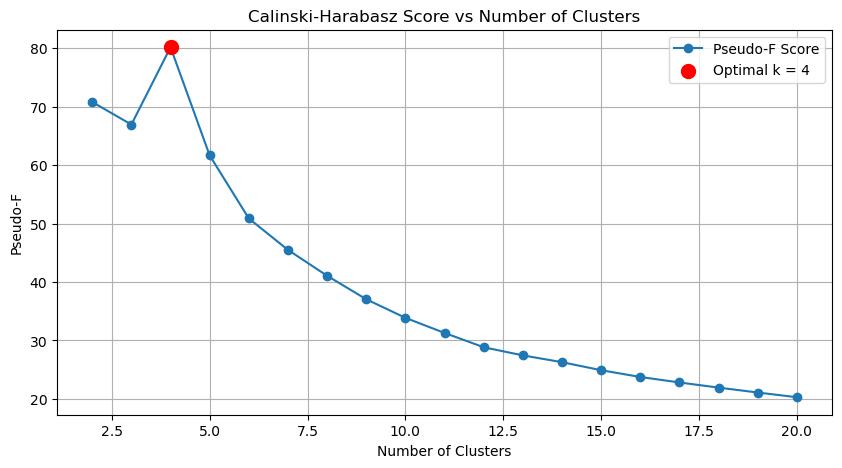

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: 4


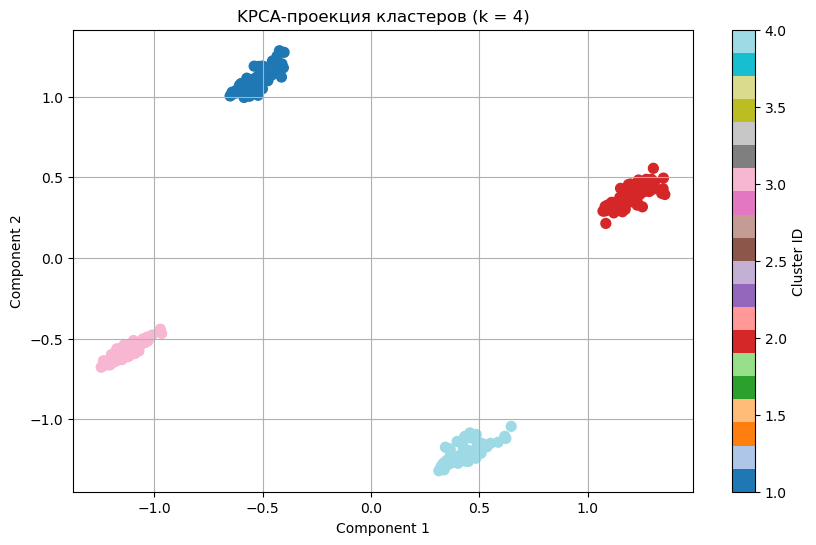


–ù–∞–∏–±–æ–ª–µ–µ —Ç–∏–ø–∏—á–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞:
–ö–ª–∞—Å—Ç–µ—Ä_1: Henderson, Dave
–ö–ª–∞—Å—Ç–µ—Ä_2: Hassey, Ron
–ö–ª–∞—Å—Ç–µ—Ä_3: Landreaux, Ken
–ö–ª–∞—Å—Ç–µ—Ä_4: Wilson, Mookie

–≠–¢–ê–ü 2: –ê–Ω–∞–ª–∏–∑ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ –∏ log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
–ê–Ω–∞–ª–∏–∑ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π:
CrAtBat        : 1.164 - –¢—Ä–µ–±—É–µ—Ç log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
CrBB           : 1.734 - –¢—Ä–µ–±—É–µ—Ç log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
CrHits         : 1.296 - –¢—Ä–µ–±—É–µ—Ç log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
CrHome         : 2.135 - –¢—Ä–µ–±—É–µ—Ç log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
CrRbi          : 1.459 - –¢—Ä–µ–±—É–µ—Ç log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
CrRuns         : 1.353 - –¢—Ä–µ–±—É–µ—Ç log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
Salary         : 1.589 - –¢—Ä–µ–±—É–µ—Ç log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
nAssts         : 1.358 - –¢—Ä–µ–±—É–µ—Ç log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
nAtBat         : 0.076 - –ù–æ—Ä–º–∞–ª—å–Ω–æ–µ


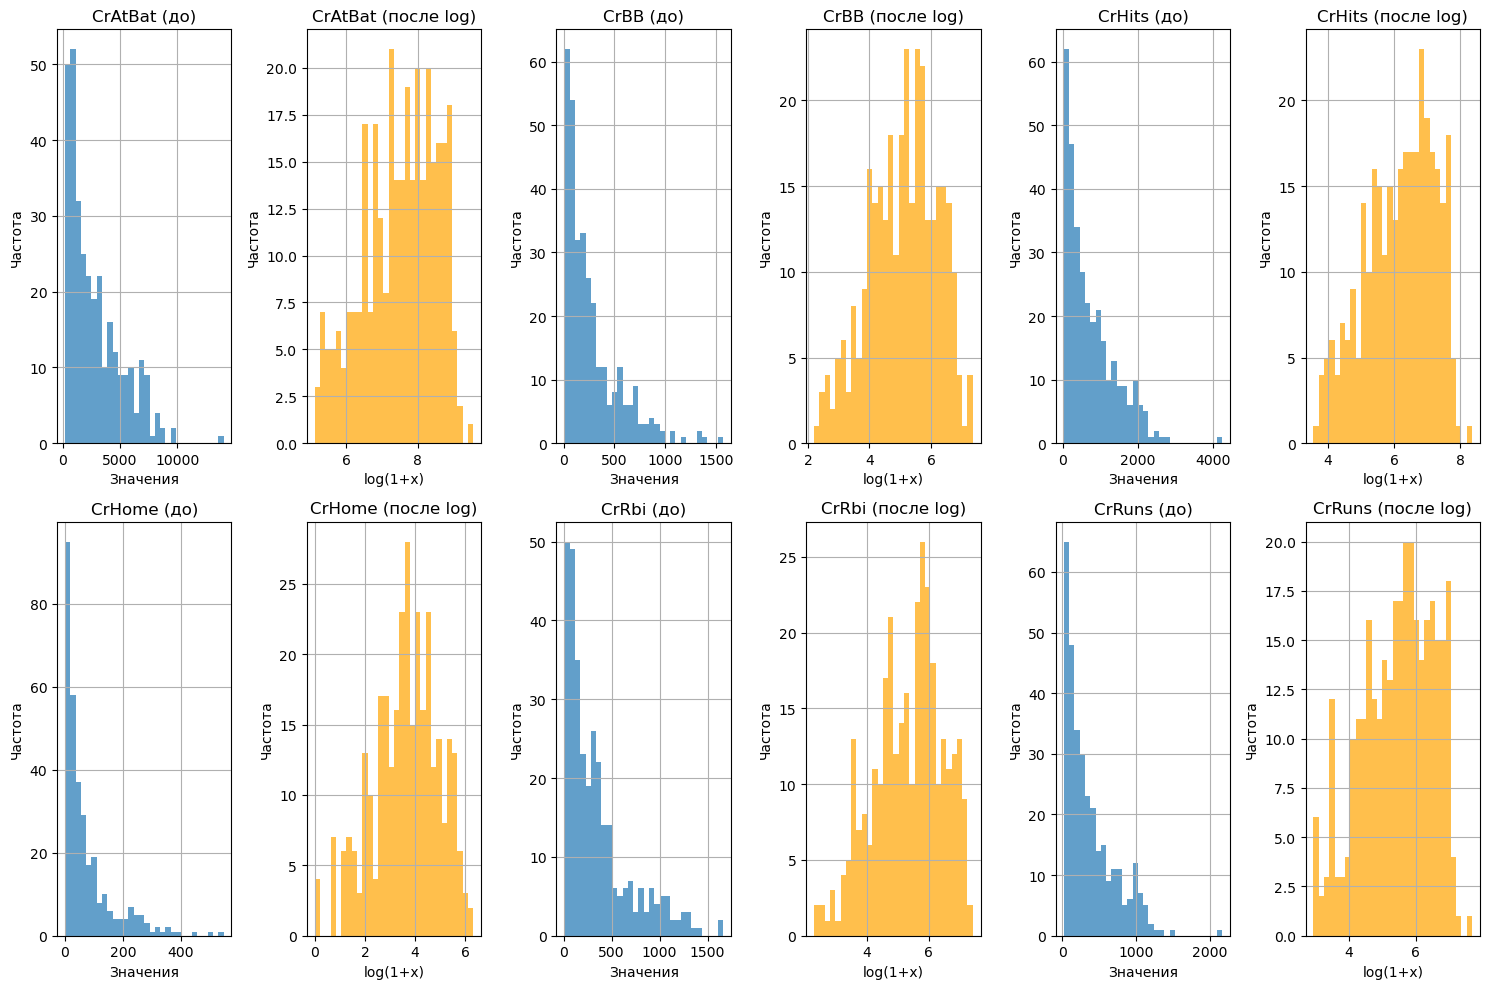


–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:
‚úì CrAtBat: –∞—Å–∏–º–º–µ—Ç—Ä–∏—è 1.164 -> -0.417
‚úì CrBB: –∞—Å–∏–º–º–µ—Ç—Ä–∏—è 1.734 -> -0.324
‚úì CrHits: –∞—Å–∏–º–º–µ—Ç—Ä–∏—è 1.296 -> -0.415
‚úì CrHome: –∞—Å–∏–º–º–µ—Ç—Ä–∏—è 2.135 -> -0.412
‚úì CrRbi: –∞—Å–∏–º–º–µ—Ç—Ä–∏—è 1.459 -> -0.372
‚úì CrRuns: –∞—Å–∏–º–º–µ—Ç—Ä–∏—è 1.353 -> -0.393
‚úì Salary: –∞—Å–∏–º–º–µ—Ç—Ä–∏—è 1.589 -> -0.177
‚úì nAssts: –∞—Å–∏–º–º–µ—Ç—Ä–∏—è 1.358 -> -0.228
‚úì nError: –∞—Å–∏–º–º–µ—Ç—Ä–∏—è 1.055 -> -0.603
‚úì nOuts: –∞—Å–∏–º–º–µ—Ç—Ä–∏—è 2.065 -> -2.202

–í—Å–µ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–æ –∫–æ–ª–æ–Ω–æ–∫: 10

–ö–õ–ê–°–¢–ï–†–ò–ó–ê–¶–ò–Ø: LOG_TRANSFORMED


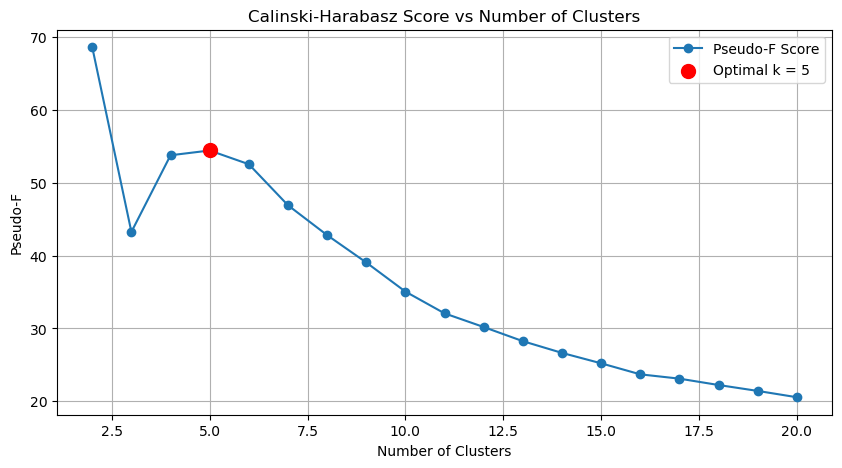

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: 5


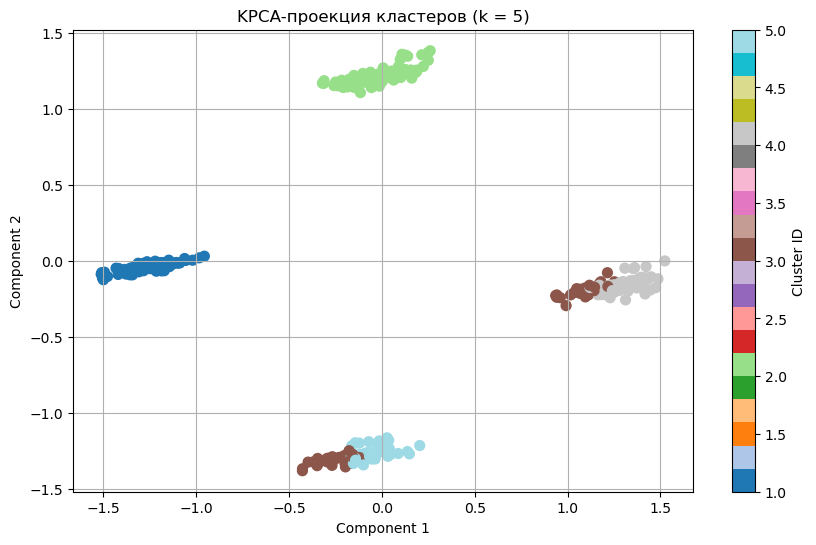


–ù–∞–∏–±–æ–ª–µ–µ —Ç–∏–ø–∏—á–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞:
–ö–ª–∞—Å—Ç–µ—Ä_1: Brock, Greg
–ö–ª–∞—Å—Ç–µ—Ä_2: Slaught, Don
–ö–ª–∞—Å—Ç–µ—Ä_3: Fitzgerald, Mike
–ö–ª–∞—Å—Ç–µ—Ä_4: Whitt, Ernie
–ö–ª–∞—Å—Ç–µ—Ä_5: Durham, Leon

–≠–¢–ê–ü 3: –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–µ—Ç–æ–¥–æ–º VarClus

–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —É–ø—Ä–æ—â–µ–Ω–Ω–æ–≥–æ VarClus:
–ü–æ—Å–ª–µ –æ—Ç–±–æ—Ä–∞ –ø–æ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –æ—Å—Ç–∞–ª–æ—Å—å 18 –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏–∑ 18
–û—à–∏–±–∫–∞ –≤ —Ñ–∞–∫—Ç–æ—Ä–Ω–æ–º –∞–Ω–∞–ª–∏–∑–µ: Input X contains NaN.
FactorAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find

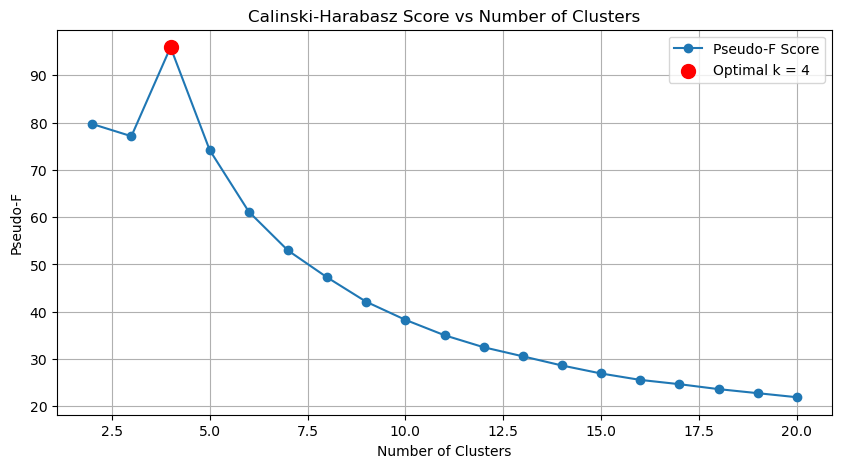

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: 4


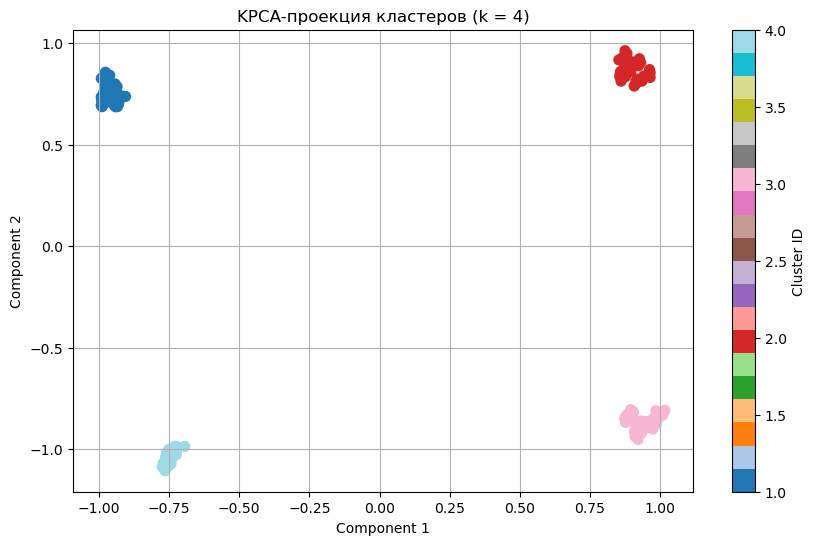


–ù–∞–∏–±–æ–ª–µ–µ —Ç–∏–ø–∏—á–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞:
–ö–ª–∞—Å—Ç–µ—Ä_1: Slaught, Don
–ö–ª–∞—Å—Ç–µ—Ä_2: Gantner, Jim
–ö–ª–∞—Å—Ç–µ—Ä_3: Law, Vance
–ö–ª–∞—Å—Ç–µ—Ä_4: Landreaux, Ken

–°–†–ê–í–ù–ò–¢–ï–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –†–ï–ó–£–õ–¨–¢–ê–¢–û–í –ö–õ–ê–°–¢–ï–†–ò–ó–ê–¶–ò–ò

1. –ö–û–õ–ò–ß–ï–°–¢–í–û –ö–õ–ê–°–¢–ï–†–û–í:
------------------------------
original            : 4 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
log_transformed     : 5 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
varclus_selected    : 4 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

2. –ö–û–õ–ò–ß–ï–°–¢–í–û –ü–†–ò–ó–ù–ê–ö–û–í:
------------------------------
original            : 22 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
log_transformed     : 22 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
varclus_selected    : 13 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

3. –¢–ò–ü–ò–ß–ù–´–ï –ü–†–ï–î–°–¢–ê–í–ò–¢–ï–õ–ò:
----------------------------------------

ORIGINAL:
  –ö–ª–∞—Å—Ç–µ—Ä_1: Henderson, Dave
  –ö–ª–∞—Å—Ç–µ—Ä_2: Hassey, Ron
  –ö–ª–∞—Å—Ç–µ—Ä_3: Landreaux, Ken
  –ö–ª–∞—Å—Ç–µ—Ä_4: Wilson, Mookie

LOG_TRANSFORMED:
  –ö–ª–∞—Å—Ç–µ—Ä_1: 

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def analyze_skewness(df, numeric_cols, threshold=1.0):
    """
    –ê–Ω–∞–ª–∏–∑ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    
    Args:
        df (pd.DataFrame): –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –¥–∞–Ω–Ω—ã–º–∏
        numeric_cols (list): —Å–ø–∏—Å–æ–∫ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
        threshold (float): –ø–æ—Ä–æ–≥ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–∏–ª—å–Ω–æ —Å–∫–æ—à–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    
    Returns:
        dict: –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ–± –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    """
    skewness_info = {}
    
    print("–ê–Ω–∞–ª–∏–∑ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π:")
    print("=" * 50)
    
    for col in numeric_cols:
        if col in df.columns:
            skew_value = df[col].skew()
            skewness_info[col] = {
                'skewness': skew_value,
                'needs_log_transform': skew_value > threshold
            }
            
            status = "–¢—Ä–µ–±—É–µ—Ç log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è" if skew_value > threshold else "–ù–æ—Ä–º–∞–ª—å–Ω–æ–µ"
            print(f"{col:<15}: {skew_value:.3f} - {status}")
    
    return skewness_info


def plot_distributions_before_after(df, cols_to_transform, figsize=(15, 10)):
    """
    –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –¥–æ –∏ –ø–æ—Å–ª–µ log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
    
    Args:
        df (pd.DataFrame): –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
        cols_to_transform (list): –∫–æ–ª–æ–Ω–∫–∏ –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
        figsize (tuple): —Ä–∞–∑–º–µ—Ä —Ñ–∏–≥—É—Ä—ã
    """
    n_cols = len(cols_to_transform)
    n_rows = (n_cols + 2) // 3
    
    fig, axes = plt.subplots(n_rows, 6, figsize=figsize)  # 6 –∫–æ–ª–æ–Ω–æ–∫: –¥–æ –∏ –ø–æ—Å–ª–µ –¥–ª—è –∫–∞–∂–¥–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, col in enumerate(cols_to_transform):
        # –î–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
        ax_before = axes[i*2] if n_rows > 1 or len(cols_to_transform) > 1 else axes[0]
        df[col].hist(bins=30, alpha=0.7, ax=ax_before)
        ax_before.set_title(f'{col} (–¥–æ)')
        ax_before.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏—è')
        ax_before.set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
        
        # –ü–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
        ax_after = axes[i*2+1] if n_rows > 1 or len(cols_to_transform) > 1 else axes[1]
        log_transformed = np.log1p(df[col])
        log_transformed.hist(bins=30, alpha=0.7, ax=ax_after, color='orange')
        ax_after.set_title(f'{col} (–ø–æ—Å–ª–µ log)')
        ax_after.set_xlabel('log(1+x)')
        ax_after.set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    
    # –°–∫—Ä—ã—Ç—å –Ω–µ–∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –æ—Å–∏
    for j in range(len(cols_to_transform)*2, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()


def apply_log_transformation(df, numeric_cols, skew_threshold=1.0):
    """
    –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∫ —Å–∏–ª—å–Ω–æ —Å–∫–æ—à–µ–Ω–Ω—ã–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º
    
    Args:
        df (pd.DataFrame): –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
        numeric_cols (list): —Å–ø–∏—Å–æ–∫ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
        skew_threshold (float): –ø–æ—Ä–æ–≥ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏
    
    Returns:
        tuple: (–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, —Å–ø–∏—Å–æ–∫ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫)
    """
    df_transformed = df.copy()
    transformed_cols = []
    
    print("\n–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:")
    print("=" * 40)
    
    for col in numeric_cols:
        if col in df.columns and col != 'logSalary':  # –ò—Å–∫–ª—é—á–∞–µ–º —É–∂–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—É—é –∫–æ–ª–æ–Ω–∫—É
            skew_value = df[col].skew()
            
            if skew_value > skew_threshold:
                # –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
                if df[col].min() >= 0:
                    df_transformed[col] = np.log1p(df[col])
                    transformed_cols.append(col)
                    print(f"‚úì {col}: –∞—Å–∏–º–º–µ—Ç—Ä–∏—è {skew_value:.3f} -> {df_transformed[col].skew():.3f}")
                else:
                    print(f"‚úó {col}: —Å–æ–¥–µ—Ä–∂–∏—Ç –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –ø—Ä–æ–ø—É—Å–∫–∞–µ–º")
    
    print(f"\n–í—Å–µ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–æ –∫–æ–ª–æ–Ω–æ–∫: {len(transformed_cols)}")
    
    return df_transformed, transformed_cols


def simple_varclus(df, n_components=None, variance_threshold=0.01):
    """
    –£–ø—Ä–æ—â–µ–Ω–Ω–∞—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è VarClus —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ñ–∞–∫—Ç–æ—Ä–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞
    –∏ –æ—Ç–±–æ—Ä–∞ –ø–æ –¥–∏—Å–ø–µ—Ä—Å–∏–∏
    
    Args:
        df (pd.DataFrame): –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏
        n_components (int): –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∞–∫—Ç–æ—Ä–æ–≤ (–µ—Å–ª–∏ None, –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏)
        variance_threshold (float): –ø–æ—Ä–æ–≥ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –¥–ª—è –æ—Ç–±–æ—Ä–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    
    Returns:
        list: —Å–ø–∏—Å–æ–∫ –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    """
    print("\n–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —É–ø—Ä–æ—â–µ–Ω–Ω–æ–≥–æ VarClus:")
    print("=" * 40)
    
    # –£–¥–∞–ª—è–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –Ω–∏–∑–∫–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π
    selector = VarianceThreshold(threshold=variance_threshold)
    df_high_var = pd.DataFrame(
        selector.fit_transform(df),
        columns=df.columns[selector.get_support()],
        index=df.index
    )
    
    print(f"–ü–æ—Å–ª–µ –æ—Ç–±–æ—Ä–∞ –ø–æ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –æ—Å—Ç–∞–ª–æ—Å—å {df_high_var.shape[1]} –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏–∑ {df.shape[1]}")
    
    # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∞–∫—Ç–æ—Ä–æ–≤
    if n_components is None:
        n_components = min(10, df_high_var.shape[1] // 2)
    
    # –§–∞–∫—Ç–æ—Ä–Ω—ã–π –∞–Ω–∞–ª–∏–∑
    fa = FactorAnalysis(n_components=n_components, random_state=42)
    
    try:
        fa.fit(df_high_var)
        loadings = pd.DataFrame(
            fa.components_.T,
            columns=[f'Factor_{i+1}' for i in range(n_components)],
            index=df_high_var.columns
        )
        
        # –î–ª—è –∫–∞–∂–¥–æ–≥–æ —Ñ–∞–∫—Ç–æ—Ä–∞ –≤—ã–±–∏—Ä–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –Ω–∞–≥—Ä—É–∑–∫–æ–π
        selected_vars = []
        for factor in loadings.columns:
            max_loading_var = loadings[factor].abs().idxmax()
            if max_loading_var not in selected_vars:
                selected_vars.append(max_loading_var)
        
        # –î–æ–±–∞–≤–ª—è–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –≤—ã—Å–æ–∫–∏–º–∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º–∏ –Ω–∞–≥—Ä—É–∑–∫–∞–º–∏
        for var in df_high_var.columns:
            max_loading = loadings.loc[var].abs().max()
            if max_loading > 0.7 and var not in selected_vars:
                selected_vars.append(var)
        
        print(f"–§–∞–∫—Ç–æ—Ä–Ω—ã–π –∞–Ω–∞–ª–∏–∑: –≤—ã–±—Ä–∞–Ω–æ {len(selected_vars)} –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö")
        print("–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ:", selected_vars[:10], "..." if len(selected_vars) > 10 else "")
        
        return selected_vars
        
    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ –≤ —Ñ–∞–∫—Ç–æ—Ä–Ω–æ–º –∞–Ω–∞–ª–∏–∑–µ: {e}")
        # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π
        variances = df_high_var.var().sort_values(ascending=False)
        selected_vars = variances.head(n_components).index.tolist()
        print(f"–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –æ—Ç–±–æ—Ä –ø–æ –¥–∏—Å–ø–µ—Ä—Å–∏–∏: –≤—ã–±—Ä–∞–Ω–æ {len(selected_vars)} –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö")
        return selected_vars


def compare_clustering_results(df, cat_cols, num_cols, transformation_type="original"):
    """
    –ó–∞–ø—É—Å–∫ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
    
    Args:
        df (pd.DataFrame): –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
        cat_cols (list): –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏
        num_cols (list): —á–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏
        transformation_type (str): —Ç–∏–ø –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–ª—è –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏
    
    Returns:
        dict: —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
    """
    print(f"\n{'='*60}")
    print(f"–ö–õ–ê–°–¢–ï–†–ò–ó–ê–¶–ò–Ø: {transformation_type.upper()}")
    print(f"{'='*60}")
    
    try:
        best_k, typical_players = process_and_cluster(df, cat_cols, num_cols)
        
        results = {
            'transformation': transformation_type,
            'best_k': best_k,
            'typical_players': typical_players,
            'n_features': len(num_cols) + len([c for c in cat_cols if c in df.columns])
        }
        
        return results
        
    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ –≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏: {e}")
        return {
            'transformation': transformation_type,
            'best_k': None,
            'typical_players': {},
            'n_features': 0,
            'error': str(e)
        }


def analyze_clustering_changes(results_list):
    """
    –ê–Ω–∞–ª–∏–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞—Ö –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
    
    Args:
        results_list (list): —Å–ø–∏—Å–æ–∫ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
    """
    print(f"\n{'='*80}")
    print("–°–†–ê–í–ù–ò–¢–ï–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –†–ï–ó–£–õ–¨–¢–ê–¢–û–í –ö–õ–ê–°–¢–ï–†–ò–ó–ê–¶–ò–ò")
    print(f"{'='*80}")
    
    # –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    print("\n1. –ö–û–õ–ò–ß–ï–°–¢–í–û –ö–õ–ê–°–¢–ï–†–û–í:")
    print("-" * 30)
    for result in results_list:
        if result['best_k'] is not None:
            print(f"{result['transformation']:<20}: {result['best_k']} –∫–ª–∞—Å—Ç–µ—Ä–æ–≤")
        else:
            print(f"{result['transformation']:<20}: –û—à–∏–±–∫–∞ –≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏")
    
    # –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    print("\n2. –ö–û–õ–ò–ß–ï–°–¢–í–û –ü–†–ò–ó–ù–ê–ö–û–í:")
    print("-" * 30)
    for result in results_list:
        print(f"{result['transformation']:<20}: {result['n_features']} –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")
    
    # –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–∏–ø–∏—á–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–µ–π
    print("\n3. –¢–ò–ü–ò–ß–ù–´–ï –ü–†–ï–î–°–¢–ê–í–ò–¢–ï–õ–ò:")
    print("-" * 40)
    for result in results_list:
        print(f"\n{result['transformation'].upper()}:")
        if result['typical_players']:
            for cluster, player in result['typical_players'].items():
                print(f"  {cluster}: {player}")
        else:
            print("  –ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö")
    
    # –ê–Ω–∞–ª–∏–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π
    print(f"\n{'='*80}")
    print("–í–´–í–û–î–´ –ò –†–ï–ö–û–ú–ï–ù–î–ê–¶–ò–ò:")
    print(f"{'='*80}")
    
    if len(results_list) >= 2:
        original = results_list[0]
        log_transformed = results_list[1] if len(results_list) > 1 else None
        varclus = results_list[2] if len(results_list) > 2 else None
        
        print("\nüîç –ê–ù–ê–õ–ò–ó –í–õ–ò–Ø–ù–ò–Ø LOG-–ü–†–ï–û–ë–†–ê–ó–û–í–ê–ù–ò–Ø:")
        if log_transformed and log_transformed['best_k'] is not None:
            if log_transformed['best_k'] != original['best_k']:
                print(f"  ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: {original['best_k']} ‚Üí {log_transformed['best_k']}")
                if log_transformed['best_k'] > original['best_k']:
                    print("  ‚Ä¢ Log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤—ã—è–≤–∏–ª–æ –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª—å–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞–Ω–Ω—ã—Ö")
                else:
                    print("  ‚Ä¢ Log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–≤–µ–ª–æ –∫ —É–∫—Ä—É–ø–Ω–µ–Ω–∏—é –∫–ª–∞—Å—Ç–µ—Ä–æ–≤")
            else:
                print("  ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å")
                print("  ‚Ä¢ –í–æ–∑–º–æ–∂–Ω–æ, –∏–∑–º–µ–Ω–∏–ª–∞—Å—å –≤–Ω—É—Ç—Ä–µ–Ω–Ω—è—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤")
            
            print("  ‚Ä¢ Log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–æ–º–æ–≥–ª–æ —Å–¥–µ–ª–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –±–æ–ª–µ–µ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã–º–∏")
            print("  ‚Ä¢ –≠—Ç–æ –º–æ–∂–µ—Ç —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤, —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö –∫ –≤—ã–±—Ä–æ—Å–∞–º")
        
        print("\nüîç –ê–ù–ê–õ–ò–ó –í–õ–ò–Ø–ù–ò–Ø –û–¢–ë–û–†–ê –ü–†–ò–ó–ù–ê–ö–û–í (VarClus):")
        if varclus and varclus['best_k'] is not None:
            print(f"  ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å–æ–∫—Ä–∞—â–µ–Ω–æ –¥–æ {varclus['n_features']}")
            if varclus['best_k'] != original['best_k']:
                print(f"  ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å: {original['best_k']} ‚Üí {varclus['best_k']}")
                print("  ‚Ä¢ –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤—ã—è–≤–∏–ª –¥—Ä—É–≥—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É –≤ –¥–∞–Ω–Ω—ã—Ö")
            else:
                print("  ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å")
                print("  ‚Ä¢ –û—Å–Ω–æ–≤–Ω–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –¥–∞–Ω–Ω—ã—Ö —Å–æ—Ö—Ä–∞–Ω–∏–ª–∞—Å—å –ø—Ä–∏ –º–µ–Ω—å—à–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")
            
            print("  ‚Ä¢ –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–∂–µ—Ç:")
            print("    - –£–º–µ–Ω—å—à–∏—Ç—å —à—É–º –≤ –¥–∞–Ω–Ω—ã—Ö")
            print("    - –ü–æ–≤—ã—Å–∏—Ç—å –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤")
            print("    - –£—Å–∫–æ—Ä–∏—Ç—å –≤—ã—á–∏—Å–ª–µ–Ω–∏—è")
            print("    - –°–Ω–∏–∑–∏—Ç—å –ø—Ä–æ–∫–ª—è—Ç–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏")


def run_comprehensive_analysis(csv_path):
    """
    –ó–∞–ø—É—Å–∫ –ø–æ–ª–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è–º–∏ –¥–∞–Ω–Ω—ã—Ö
    
    Args:
        csv_path (str): –ø—É—Ç—å –∫ CSV —Ñ–∞–π–ª—É
    
    Returns:
        list: —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤—Å–µ—Ö —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤
    """
    # –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    df = pd.read_csv(csv_path)
    
    cat_cols = ['Div', 'Division', 'League', 'Position', 'Team']
    num_cols = [
        'CrAtBat', 'CrBB', 'CrHits', 'CrHome', 'CrRbi', 'CrRuns',
        'Salary', 'nAssts', 'nAtBat', 'nBB', 'nError',
        'nHits', 'nHome', 'nOuts', 'nRBI', 'nRuns', 'YrMajor'
    ]
    
    results = []
    
    # 1. –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
    print("–≠–¢–ê–ü 1: –ê–Ω–∞–ª–∏–∑ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö")
    original_result = compare_clustering_results(df, cat_cols, num_cols, "original")
    results.append(original_result)
    
    # 2. –ê–Ω–∞–ª–∏–∑ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ –∏ log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
    print("\n–≠–¢–ê–ü 2: –ê–Ω–∞–ª–∏–∑ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ –∏ log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ")
    skewness_info = analyze_skewness(df, num_cols)
    
    cols_to_transform = [col for col, info in skewness_info.items() 
                        if info['needs_log_transform'] and col != 'logSalary']
    
    if cols_to_transform:
        print(f"\n–ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, —Ç—Ä–µ–±—É—é—â–∏–µ log-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è: {cols_to_transform}")
        plot_distributions_before_after(df, cols_to_transform[:6])  # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –ø–µ—Ä–≤—ã–µ 6
        
        df_log_transformed, transformed_cols = apply_log_transformation(df, num_cols)
        log_result = compare_clustering_results(df_log_transformed, cat_cols, num_cols, "log_transformed")
        results.append(log_result)
    else:
        print("–ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å —Å–∏–ª—å–Ω–æ–π –∞—Å–∏–º–º–µ—Ç—Ä–∏–µ–π –Ω–µ –Ω–∞–π–¥–µ–Ω—ã")
        results.append({
            'transformation': 'log_transformed',
            'best_k': None,
            'typical_players': {},
            'n_features': 0,
            'note': '–ù–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è'
        })
    
    # 3. VarClus –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    print("\n–≠–¢–ê–ü 3: –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–µ—Ç–æ–¥–æ–º VarClus")
    
    # –ü–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è VarClus (—Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ)
    df_for_varclus = df[num_cols].copy()
    df_for_varclus['logSalary'] = np.log1p(df_for_varclus['Salary'])
    
    selected_features = simple_varclus(df_for_varclus, n_components=8)
    
    if selected_features:
        # –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π —Å–ø–∏—Å–æ–∫ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
        num_cols_selected = [col for col in selected_features if col in num_cols + ['logSalary']]
        
        varclus_result = compare_clustering_results(df, cat_cols, num_cols_selected, "varclus_selected")
        results.append(varclus_result)
    else:
        results.append({
            'transformation': 'varclus_selected',
            'best_k': None,
            'typical_players': {},
            'n_features': 0,
            'error': '–ù–µ —É–¥–∞–ª–æ—Å—å –æ—Ç–æ–±—Ä–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏'
        })
    
    # 4. –ö–æ–º–ø–ª–µ–∫—Å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    analyze_clustering_changes(results)
    
    return results


# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è:
results = run_comprehensive_analysis('baseball.csv')
print("–ö–æ–¥ –≥–æ—Ç–æ–≤ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é!")
print("–ó–∞–ø—É—Å—Ç–∏—Ç–µ: results = run_comprehensive_analysis('baseball.csv')")